# **Project: Decision Trees and Random Forest - Loan Eligibility Prediction**

# Marks: 30


Welcome to the project on classification using decision trees and random forests. 

We will continue our work on the Loan Eligibility Prediction dataset for this project.

----------------
## **Context:** 
----------------

**Credit risk is the risk of financial loss resulting from the failure by a borrower to repay the principal and interest owed to the lender.** The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses. 

------------------
## **Objective:**
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently the customer first applies for a home loan, after which the company validates the customer's eligibility for that loan. 

Now, the company wants to automate this loan eligibility process. They want to harness their past customers' data to **build a model to predict whether the loan should be approved or not.** This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## **Data Dictionary:**
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands) 
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

## **Importing the necessary libraries and overview of the dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## **Loading the data**

In [3]:
data = pd.read_csv("CreditRisk.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


## **Checking the info of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


**Observations:**

- There are **614 observations and 13 columns** in the data.
- ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, and Loan_Status are numeric data types. **The rest of the variables are of the object data type.**
- There are several columns with less than 614 non-null entries i.e. **these columns have missing values.**
- **Loan_ID column is an identifier.** Let's check if each entry of the column is unique.

In [5]:
data.Loan_ID.nunique()

614

**Observations:**
- We can see that **all the entries of this column are unique.** Hence, this column would not add any value to our analysis. 
- Let's drop this column.

## **Exploratory Data Analysis and Data Preprocessing**

**Note:** We have explored this data earlier in the project for classification. Here, we will simply look at some basic univariate analysis and data preprocessing and move to the model building section.

## **Dropping the Loan_ID column**

In [6]:
data.drop(columns=['Loan_ID'], inplace=True)

## **Summary Statistics for numerical columns**

In [7]:
#Creating a list of numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0


**Observations:**

- The average income of applicants is about 5,403 dollars. It has a large range of values from 150 to 81,000. It would be interesting to see if low applicant income implies a low loan amount.
- The average co-applicant income is about 1,621 dollars which is much lower than the applicant's income. The 25th percentile value is 0 and the median value is 1,188 dollars which implies that the number of joint home loans is more than the number of non-joint loans.
- The two columns `ApplicantIncome` and `CoapplicantIncome` give the same information i.e. income of applicants. It would be better to have that information in one column only. We can add these two columns to get the total income per application.
- The 25th, 50th, and 75th percentile value of the loan term is 360 months i.e. 30 years. This implies that the majority of home loans in this dataset are for 30 years of term.
- We can convert the scale of the loan term from months to years to make it easier to read.
- The average loan amount is 141 dollars. It has a large range of values, which is to be expected. 
- The loan amount has zero values, which is absurd since loan amounts are meant to be non-zero. So we can treat 0's as missing values.

Before imputing the missing values and 0's in `LoanAmount`, let's do some feature engineering and check the distributions, counts, and outliers for different variables.

## **Feature Engineering**

In [8]:
#Converting the scale of loan term from months to years
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

In [9]:
#Adding the applicant and co-applicant income to get the total income per application
data['total_income']=data['ApplicantIncome'] + data['CoapplicantIncome']

In [10]:
#Dropping the columns as we created a new column which captures the same information
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

## **Checking the percentage of each category for categorical variables**

In [11]:
#Creating list of categorical columns
cat_col= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

for col in cat_col:
    print(data[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40)                                  #Print the * 40 times to separate different variables

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
****************************************
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
****************************************
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
****************************************
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
****************************************
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
****************************************
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64
****************************************
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
****************************************
1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64
****************************************


**Observations:**

- Percentage of male customers (approx 81%) is more than the percentage of female customers (approx 19%).
- About 65% of customers are married. This indicates that married people apply more for the home loan as compared to non-married people.
- The majority of customers have 0 or 1 dependents. Some of these entries are 3+ which means 3 or more dependents. Since we don't know the actual number, we can treat this as a separate category.
- About 78% of customers are graduate. It looks like the majority of customers are educated.
- Only ~14% of customers are self-employed. This indicates that salaried people apply more for the home loan.
- The majority of customers, about 84%, have credit history as per the required guidelines.
- The count of observations is approximately evenly distributed among Urban, Semi-Urban, and Rural areas. This implies that the company has a presence in all kinds of areas.
- The number of home loans approved is comparatively higher than the number of those not approved. About 69% of applied loans get approved. Although we have limited data, the reason for this could either be a fairly lenient attitude from the company towards approving loans OR that many of the customers applying for these home loans are actually eligible for them.

#### Imputing missing values

In [12]:
#Imputing missing values with mode for the categorical variables 
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    data[col].fillna(value=data[col].mode()[0], inplace=True)

In [13]:
#Replacing 0's with null values in loan amount 
data.LoanAmount.replace(0, np.nan, inplace=True)

#Imputing null values in loan amount with the median
data.LoanAmount.fillna(value=data.LoanAmount.median(), inplace=True)

#### Preparing data for modeling

In [14]:
#Separating target variable and other variables
X=data.drop(columns='Loan_Status')
Y=data['Loan_Status']

In [15]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [16]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=7)

Now, we are done with the data preprocessing. Let's move to the model building section.

## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem on hand.**

### Model evaluation criterion:

#### Since this is a binary classification problem, the model can make wrong predictions in one of two ways:
1. Predicting a customer is not eligible for a loan when the customer actually is eligible - **Loss of opportunity**
2. Predicting a customer is eligible for a loan when the customer is actually not - **Financial Loss**

#### Which case is more important? 
* **Predicting that the customer is eligible when he is not**, because the person might default or not be able to return the loan, which would result in financial loss to the company.

#### How to reduce this loss i.e need to reduce False Negatives?
* In classification, the class of interest is considered the positive class. Here, the class of interest is 0 i.e. identifying non-eligible customers. So, the company wants to minimize the number of false negatives, in other words **Recall** is the evaluation criterion to be maximized.

### Note
- We have already seen the classification performance earlier using Logistic Regression and the KNN classifier.
- Here, **we will aim to get better recall for class 0** as the company would want the model to correctly identify as many of the 'non-eligible' customers as possible.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [17]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Decision Tree**

In this section, we will implement a decision tree classifier on the data.


### **Question 1:** 
- **Fit the decision tree classifier on the training data (use random_state=7) (2 Marks)**
- **Check the performance on both training and testing data (use metrics_score function) (2 Marks)**
- **Write your observations (2 Marks)**

In [19]:
#Fitting the decision tree classifier on the training data
d_tree =DecisionTreeClassifier(random_state=7)

d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

**Let's check the performance on the training data:**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       298

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



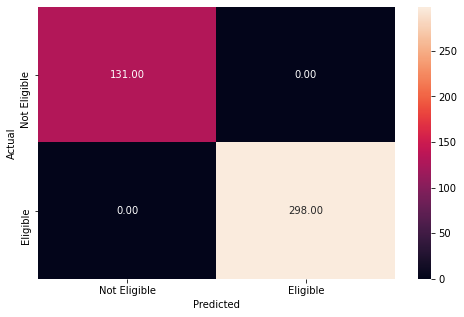

In [23]:
#Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train,y_pred_train1)

**Observations:**
- The Decision Tree predicts perfectly the training data (100% accuracy, recall, precision, etc). 
- It is very likely that the model is overfitted (to confirm with the test data)

**Let's check the performance of the model on the testing data:**

              precision    recall  f1-score   support

           0       0.65      0.54      0.59        61
           1       0.79      0.85      0.82       124

    accuracy                           0.75       185
   macro avg       0.72      0.70      0.71       185
weighted avg       0.74      0.75      0.75       185



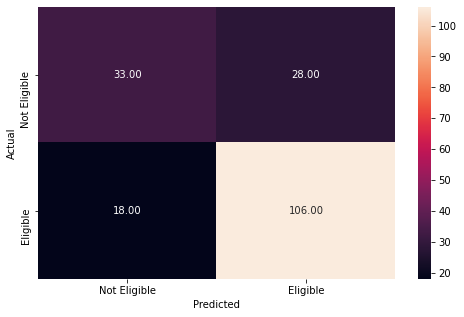

In [24]:
#Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test,y_pred_test1)

**Observations:_____________**
- The Decision Tree predicts the training data rather poorly (e.g. 54% recall for class 0). 
- The Decision Tree is clearly overfitted (it has perfect performances on the training and poor performance on the test data). It cannot be generalized.
- The overfitting very likely comes from the model complexity, in particular the large tree depth. In fact, we have used the default parameters for DecisionTree, notably no limit on max Tree depth, or other criteria that may limit the tree depth (e.g. samples per nodes, samples per child nodes, etc). As a result, the tree is build until all leaf nodes are 100% pure. 

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** in order to reduce overfitting of the model. We can tune some other hyperparameters as well.

## **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with value equal to {0:0.7, 1:0.3} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 0 is the important class here.**

In [25]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight={0:0.7, 1:0.3})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 0
scorer = metrics.make_scorer(recall_score, pos_label=0)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data 
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, criterion='entropy',
                       max_depth=7, min_samples_leaf=20, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

### **Question 2:**
- **Check the performance on both training and testing data (2 Marks)**
- **Compare the results with the results from the decision tree model with default parameters and write your observations (2 Marks)**

              precision    recall  f1-score   support

           0       0.57      0.79      0.66       131
           1       0.89      0.74      0.81       298

    accuracy                           0.75       429
   macro avg       0.73      0.76      0.73       429
weighted avg       0.79      0.75      0.76       429



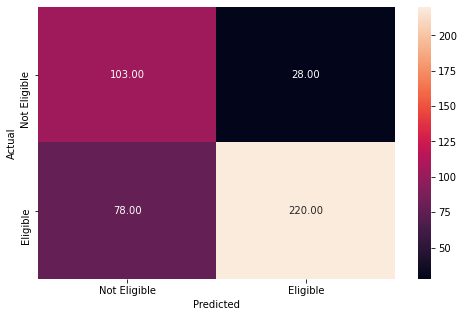

In [27]:
#Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train,y_pred_train2)

**Observations:_____________**
- The metric of interest (Recall on class 0) is 0.79, which is acceptable. This means in 79% of cases we correctly refuse a loan to customers that should not get one. In 21% we mistakenly loan with the risk that they may default. 
- Meanwhile, the precision on class 0 is rather low (0.57), meaning only 57% of the loans we have refused were for customers that should not get one. 

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.51      0.61      0.56        61
           1       0.79      0.72      0.75       124

    accuracy                           0.68       185
   macro avg       0.65      0.66      0.65       185
weighted avg       0.70      0.68      0.69       185



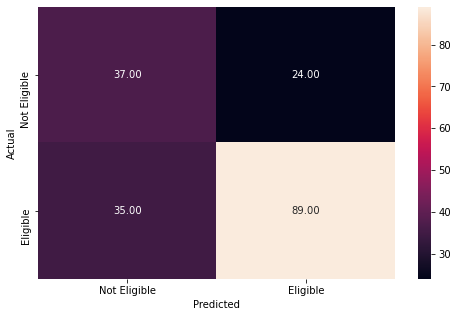

In [28]:
#Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test,y_pred_test2)

**Observations:_____________**

- The Decision Tree is slightly overfitted, but still generalizable. It performs rather similarly on the Train and Test Datasets, despite a small loss of performance. The metric of Interest (Recall on class 0) is 0.79 vs 0.61. Other metrics are also similar (for example, precision on class 0 is 0.57 vs 0.51). This model could still be used in practice with some acknowledgments of its limitations.

**Let's visualize the tuned decision tree** and observe the decision rules:

### **Question 3: Write your observations from the below visualization of the tuned decision tree (3 Marks)**

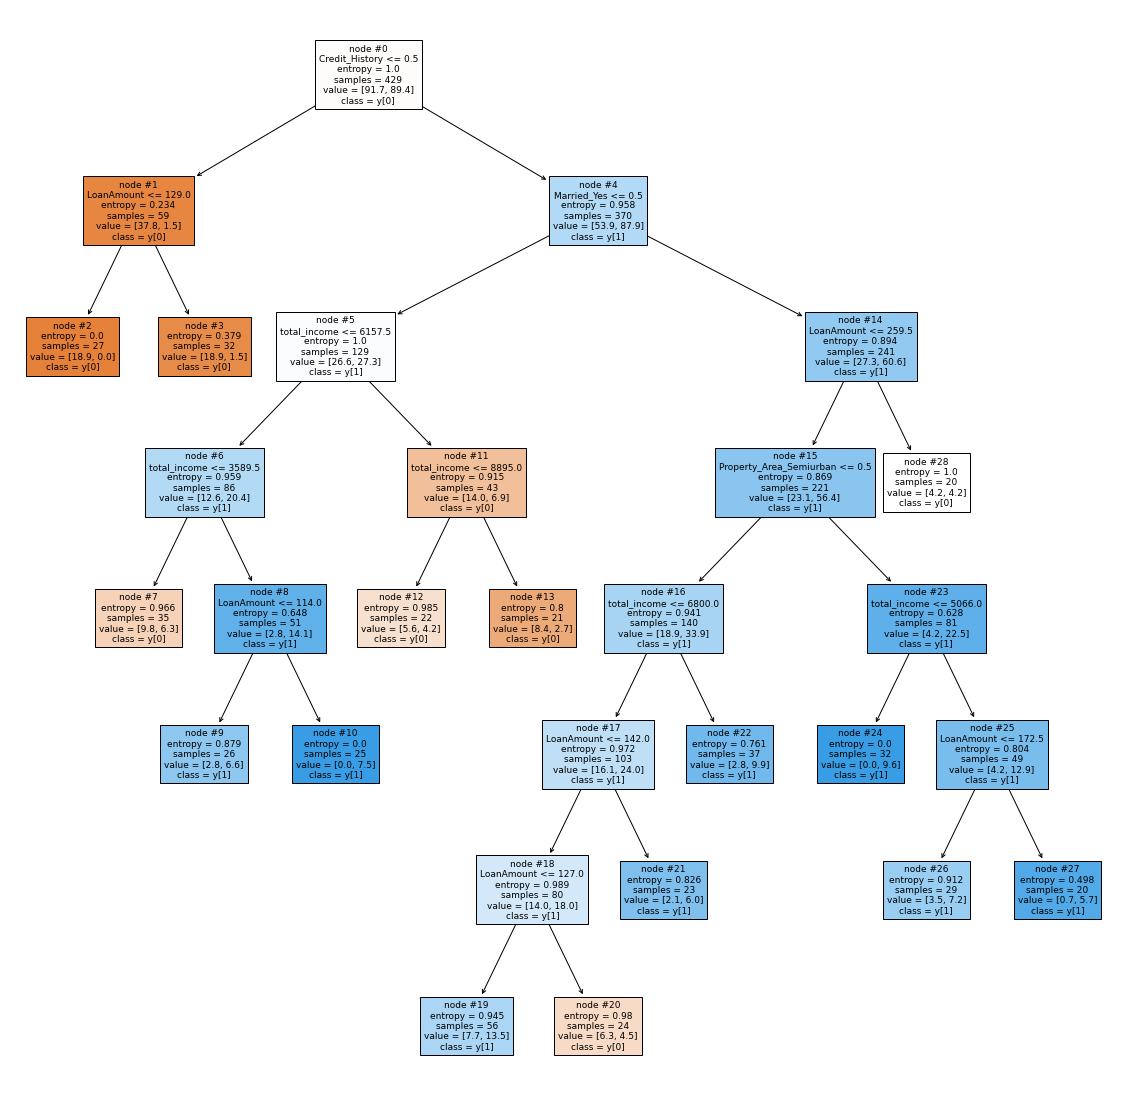

In [29]:
features = list(X.columns)

plt.figure(figsize=(20,20))

tree.plot_tree(d_tree_tuned,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

**Observations:_____________**
- This tree has a max depth of 7 levels as specified by the hyperparameters. But only one branch reaches this depth. The other branches are prunned by the criteria that they must hold at least 20 samples in each node. This is a model of medium complexity that is still readable. 
- The splits are selected based on entropy (i.e. information gain) criteria. By convention, the left child node is of a split holds samples with test outcome = True. The tree separates well the label into class 0 (orange) and class 1 (blue). There are three main branches, one mostly of class 0 (left-most), one mostly of class 1 (right most), and one with mixed classes (middle). 
- For a given node, the entropy estimates the mixing on the label Y (entropy=1 for most mixed, =0 for a pure node). There are a few pure leaf nodes (node 2 and 10) We also see information on the number of samples in the node, the dominant class of the label Y. If the node has childs, the test used for split is also indicated.
- Numerical features can be reused twice within a branch: this is what happends at node 17 and its child node 18, where we split according to LoanAmount<=142 and LoanAmount<=127. What this does in practice is to separate the samples with 127<=LoanAmount<=142. Meanwhile, categorical features can only be used once in a branch.
- Beware that this is a weighted tree (in order to address an unbalanced dataset on the label Y), which intervenes in the algorithm for attribute selection performed for each split. 

**Let's look at the feature importance** of the tuned decision tree model:

In [30]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Credit_History           0.574778
total_income             0.206104
LoanAmount               0.122203
Married_Yes              0.054235
Property_Area_Semiurban  0.042681
Loan_Amount_Term         0.000000
Gender_Male              0.000000
Dependents_1             0.000000
Dependents_2             0.000000
Dependents_3+            0.000000
Education_Not Graduate   0.000000
Self_Employed_Yes        0.000000
Property_Area_Urban      0.000000


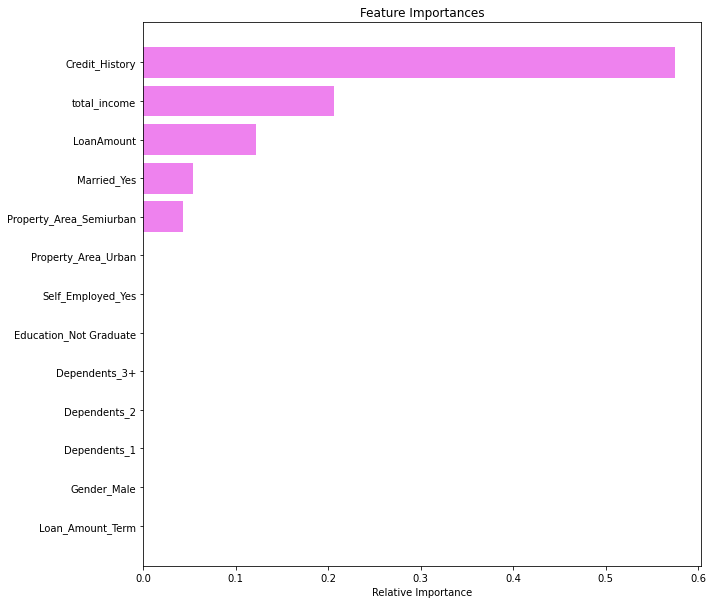

In [31]:
#Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- **Credit history is the most important feature** **followed by total income and loan amount** which makes sense.
- **Married_Yes and Property_Area_Semiurban have some importance** and the rest of the variables have no impact in this model, while deciding loan eligibility.

Now let's build another model - **a random forest classifier**

## **Random Forest Classifier**

### **Question 4:** 
- **Fit the random forest classifier on the training data (use random_state=7) (2 Marks)**
- **Check the performance on both training and testing data (use metrics_score function) (2 Marks)**
- **Write your observations (2 Marks)**

In [32]:
#Fitting the decision tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=7)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=7)

**Let's check the performance of the model on the training data:**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       298

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



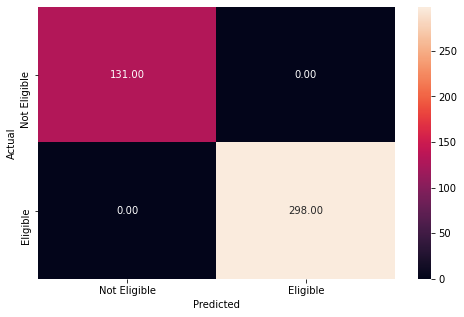

In [33]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train,y_pred_train3)

**Observations:_____________**
- The Random Forest predicts perfectly the training data (100% accuracy, recall, precision, etc). 
- It is very likely that the model is overfitted (to confirm with the test data)

**Let's confirm this by checking its performance on the testing data:**

              precision    recall  f1-score   support

           0       0.81      0.49      0.61        61
           1       0.79      0.94      0.86       124

    accuracy                           0.79       185
   macro avg       0.80      0.72      0.74       185
weighted avg       0.80      0.79      0.78       185



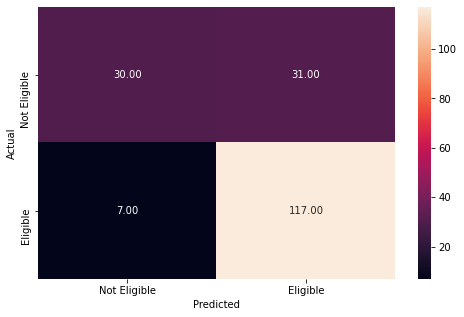

In [34]:
#Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test,y_pred_test3)

**Observations:_____________**
- The Random Forest predicts the training data rather poorly (e.g. 49% recall for class 0). 
- The Random Forest is clearly overfitted (it has perfect performances on the training and poor performance on the test data). It cannot be generalized.
- The overfitting very likely comes from the model complexity, in particular the large tree depth. In fact, we have used the default parameters for Random Forest, notably no limit on max Tree depth, or other criteria that may limit tree depth. Each tree from the Random Forest is build until all leaf nodes are 100% pure. 

 **Let's see if we can get a better model by tuning the random forest classifier:**

## **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [35]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 0
scorer = metrics.make_scorer(recall_score, pos_label=0)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [36]:
#Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=0.9,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.98      0.48      0.65       131
           1       0.81      1.00      0.90       298

    accuracy                           0.84       429
   macro avg       0.90      0.74      0.77       429
weighted avg       0.87      0.84      0.82       429



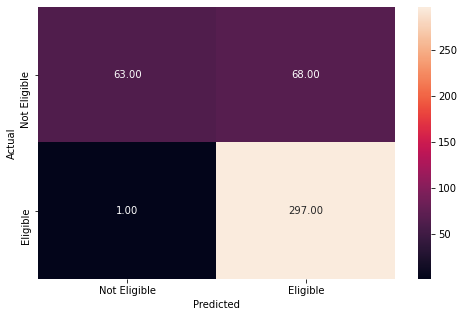

In [37]:
#Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

**Observations:**
- We can see that after hyperparameter tuning, the model is performing poorly on the train data as well.
- We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get a better performance.

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.** 

### **Question 5:**
- **Tune the random forest classifier using GridSearchCV (2 Marks)**
- **Check the performance on both training and testing data (2 Marks)**
- **Compare the results with the results from the random forest model with default parameters and write your observations (2 Marks)**

In [39]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0:0.7, 1:0.3}, "balanced", {0:0.4, 1:0.1}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 0
scorer = metrics.make_scorer(recall_score, pos_label=0)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.4, 1: 0.1}, criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

**Let's check the performance of the tuned model:**

              precision    recall  f1-score   support

           0       0.52      0.85      0.65       131
           1       0.91      0.65      0.76       298

    accuracy                           0.71       429
   macro avg       0.71      0.75      0.70       429
weighted avg       0.79      0.71      0.72       429



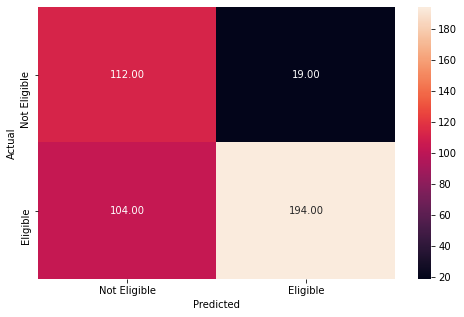

In [40]:
#Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train5)

**Observations:_____________**
- The metric of interest (Recall on class 0) is 0.85, which is good. This means in 85% of cases we correctly refuse a loan to customers that should not get one. In 15% we mistakenly loan with the risk that they may default. 
- Meanwhile, the precision on class 0 is rather low (0.52), meaning only 52% of the loans we have refused were for customers that should not get one. This is acceptable as precision is not the main goal.

**Let's check the model performance on the test data:**

              precision    recall  f1-score   support

           0       0.50      0.70      0.59        61
           1       0.82      0.65      0.73       124

    accuracy                           0.67       185
   macro avg       0.66      0.68      0.66       185
weighted avg       0.71      0.67      0.68       185



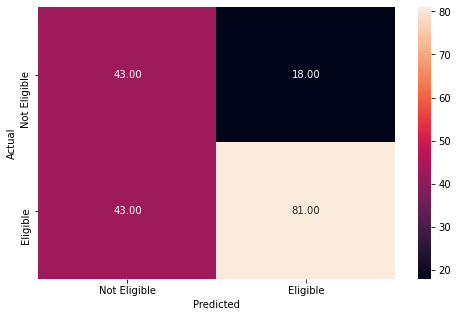

In [41]:
#Checking performance on the testing data
y_pred_test5 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test5)

**Observations:_____________**
- The Random Forest is slightly overfitted, but still generalizable. It performs rather similarly on the Train and Test Datasets, despite a small loss of performance. The metric of Interest (Recall on class 0) is 0.85 vs 0.70. Other metrics are also similar (for example, precision on class 0 is 0.52 vs 0.5). This model could still be used in practice with some acknowledgments of its limitations.
- Our first hyperparameter search decreased model complexity by limiting tree depth, but this didnt improve the recall compared to the default hyperparameters. In this new hyperparameter search, what we have further modified is the randomization of each tree, leading to more diverse trees. This is likely the reason for improved performances:
    1. First, we decreased the max_features to 80%, meaning for each split the best feature is chosen from a randomized subset of 90% of all available features. For example, around 20% of trees used a different feature than Credit_History for the root split.
    2. Second, we decreased the max_samples to 90%, meaning we bootstrapped smaller sample sizes. This also increased the diversity of the trees.


**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importances of the model.**

### **Question 6:** 

**Write your observations on the below plot for feature importance of the random forest classifier (2 Marks)**

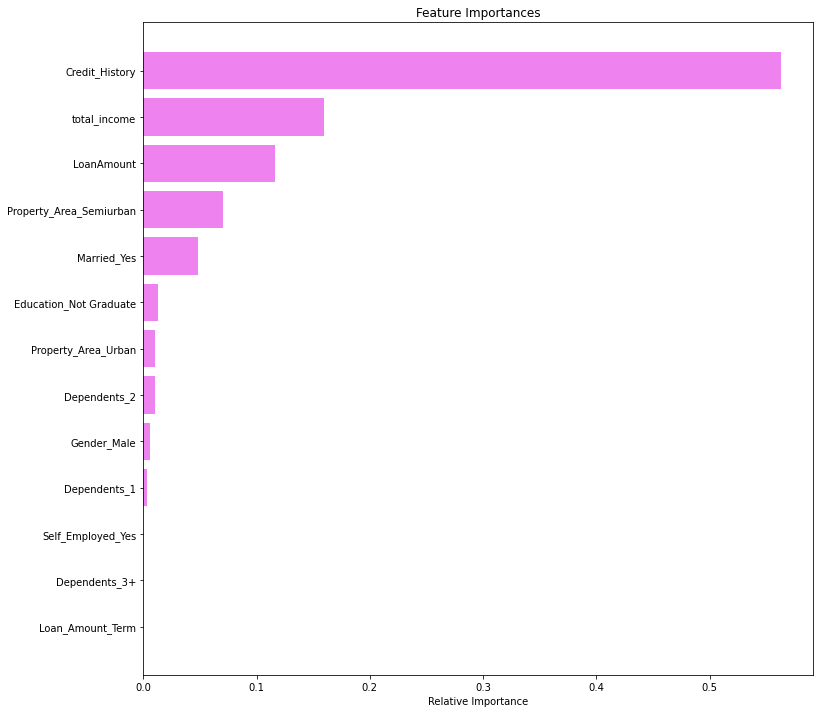

In [43]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:_____________**
- The most important feature is by far the Credit_History. Total_income, LoanAmount, Semiurban and Married are secondary but also important. These findings are similar to the ones for the Decision Tree.
- As compared to the Decision Tree, there is importance given to new features such as Education, Urban, Dependents and Gender. This is likely a result of the randomization of features (max_features 80%): during the attribute selection step, new features can be used more often when the more important ones have been randomly omitted. For example, around 20% of trees used a different feature than Credit_History for the root split. 

## **Conclusion and Recommendations**

### **Question 7:**

**Write your conclusions on the key factors that drive the approval of loans and write your recommendations to the business on how can they minimize credit risk. (3 Marks)**

**Conclusions___________:**

We have built a Decision Tree Classifier as well as a Random Forest Classifier in order to predict loan attribution. For this problem it is much more important to avoid False Negatives (Predict Egibility when it isnt) than False Positives (on the class 0). This means we are more interested in maximizing Recall than Precision. 

**Exploratory Data Analysis and Data Preprocessing**
- Most of the Exploratory Data Analysis was performed in a previous notebook and overlooked here. 
- Like in previous notebook, there were several missing values which we have filled using mode (for categorical features) or median (for numerical features). 
- We feature engineered Total Income (replacing Applicant and Co-applicant Income) to reduce the number of features (and likely avoid strong multicollinearity).
- We feature engineered numerical variables for each categorical variable using One-Hot Encoding. This is required for practical issues with sklearn, but in theory Decision Trees and Random Forest Classifers would be able to handle categorical data as well as numerical data. 

**Model Building: Decision Tree**
- The Decision Tree build with default hyperparameter is extremely overfitted. This is likely due to its large depth (the algorithm stops when all leaves are pure). 
- A better hyperparameter search gives a tree with recall 61% on test data, that is slightly overfitted. This model could still be used in practice with some acknowledgments of its limitations. 
- The main advantage of this model is its explainability. The resulting tree is readable, with max depth 7 and a structure consisting of tree main branches. The feature importance shows that Credit History is by far the most important feature, followed by Income, Loan Amount, Marital Status and living in a SemiUrban area.

**Model Building: Random Forest**
- The Random Forest build with default hyperparameter is extremely overfitted. We performed a first hyperparameter search that reduced the tree depth, but it didnt improve the model performances.
- A second hyperparameter search yield much better results. The new model has a recall of 70% on test data. This model is generalizable and could be used in practice, despite being slightly overfitted.
- What improved the model with the second hyperparameter search was mostly the randomization of trees: it decreased the max_features to 80%, and decreased the max_samples to 90%. This means trees in the Random Forest were more diverse.
- This diversity reflects in the feature importance. We retrieve the feature importance from the Decision Tree (Credit History, followed by Income, Loan Amount,etc), but also rely a little on new features such as Education, living in an Urban Area, number of dependents and Gender.

**Recommendations____________:**

**Model Use:**
- The Decision Tree model has average predictive power (61%), while the Random Forest model has good predictive power (70%). Both model are slightly overfitted but can be generalized given that their limitations are ackowledged.
- It is recommended to use both models in tandem. The Decision Tree is readable (explainable), and can be used to understand the overall structure of the decision process. The Random Forest isnt as explainable but can be used for predictions. These models are also consistent with each other, for example in terms of feature importance.
- From a practical point of view, it is clear that Credit History should be by far the most important feature to look when deciding on accepting a loan. Total Income and Loan Amount may also be looked when a decision cannot be reached. For more ambiguous cases, one may look at the predictions from the Decision Tree and Random Forest to help reach a decision. 

**Model Improvements:**
- For a final model, it would be important to refine the hyperparameter searches. In particular, map the dependency of recall on features and check for potential issues when optimizing (e.g. local minima or plateau). The Cross-Validation parameter should be slightly increased as well (cv=10 instead of 5) for increased statistical confidence.
